In [1]:
%matplotlib widget

In [57]:
from itertools import product
#clustering shops
shops_cats = pd.DataFrame(
    np.array(list(product(*[matrix['shop_id'].unique(), matrix['item_category_id'].unique()]))),
    columns =['shop_id', 'item_category_id']
)
temp = matrix.groupby(['item_category_id', 'shop_id']).agg({'item_cnt_month':'sum'}).reset_index()
temp2 = temp.groupby('shop_id').agg({'item_cnt_month':'sum'}).rename(columns={'item_cnt_month':'shop_total'})
temp = temp.join(temp2, on='shop_id')
temp['category_proportion'] = temp['item_cnt_month']/temp['shop_total']
temp = temp[['shop_id', 'item_category_id', 'category_proportion']]
shops_cats = pd.merge(shops_cats, temp, on=['shop_id','item_category_id'], how='left')
shops_cats = shops_cats.fillna(0)
shops_cats = shops_cats.pivot(index='shop_id', columns=['item_category_id'])

In [1]:
import gc
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

import lightgbm as lgbm

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler
# %config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
matrix = pd.read_pickle("matrixcheckpoint_final.pk1")

In [68]:
# train = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
# items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
# item_categories = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")

# train = train.merge(items, on="item_id", how="left")
# train = train.merge(item_categories, on="item_category_id", how="left")
# # items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")

In [ ]:
max_components = 39
errlist = []
ncomponents = range(1,max_components)
for i in ncomponents:
    nmf = NMF(n_components=i, max_iter = 100000, l1_ratio=1)
    components = nmf.fit_transform(df)
    errlist.append(nmf.reconstruction_err_)

C:\Users\grant\anaconda3\envs\predsales\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 100000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


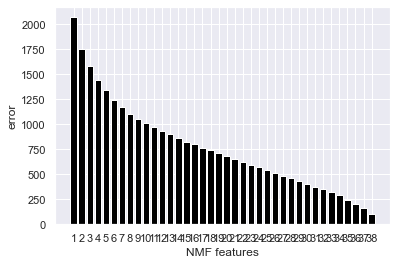

In [182]:
# Plot the err
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ncomponents, errlist, color='black')
# ax.bar(features, pca.reconstruction_err_, color='black')
plt.xlabel('NMF features')
plt.ylabel('error')
plt.xticks(ncomponents)
plt.show()

In [29]:
# NMF version
df = pt
nmf = NMF(n_components=4, max_iter = 10000, l1_ratio=1)
components = nmf.fit_transform(df)
components = pd.DataFrame(components)

In [6]:
matrix = pd.read_pickle("matrixitemartist.pk1")

In [92]:
matrix = pd.read_pickle("matrixitemnoartist.pk1")

In [7]:
start_month=8
end_month=32
mx = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month} & shop_id!=36 & shop_id!=55 & shop_id!=12")
# mx = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month} & shop_id!=36")

In [8]:
pt = mx.pivot_table(values='item_cnt_month', columns='shop_id', index=['itemnamegroup'], fill_value=0, aggfunc='mean')
pt = pt.transpose()

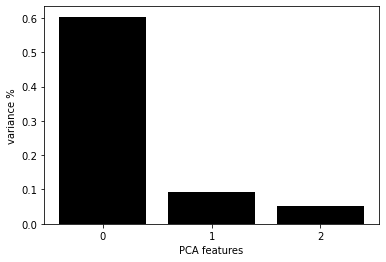

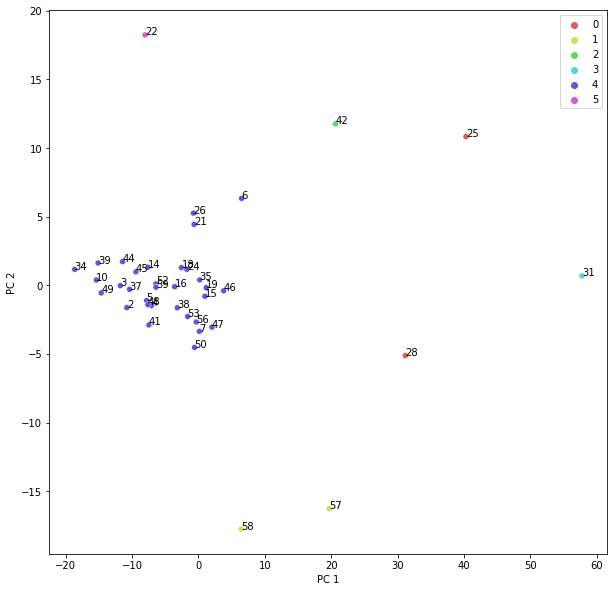

In [11]:
# PCA version
df = pt
# Standardize the data to have a mean of ~0 and a variance of 1
# df = StandardScaler().fit_transform(df)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
components = pd.DataFrame(principalComponents)
# Plot the explained variances
features = range(pca.n_components_)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(features, pca.explained_variance_ratio_, color='black')
# ax.bar(features, pca.reconstruction_err_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

n_clusters = 6
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
# clusterer = KMeans(n_clusters=n_clusters)
# components.loc[:,:] = StandardScaler().fit_transform(components)
labels = clusterer.fit_predict(components)

x = components[0]
y = components[1]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.scatter(x, y, alpha=.5)
sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls",n_clusters), ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for i, txt in enumerate(pt.index.to_list()):
    ax.annotate(str(txt), (x[i], y[i]))

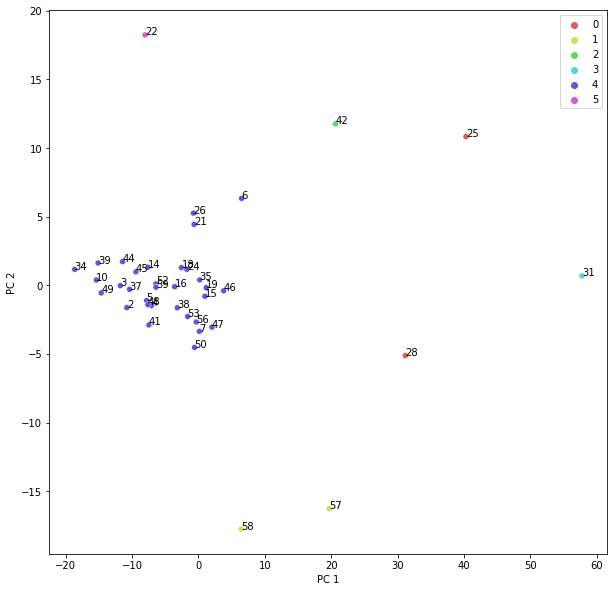

In [12]:
n_clusters = 6
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
# clusterer = KMeans(n_clusters=n_clusters)
# components.loc[:,:] = StandardScaler().fit_transform(components)
labels = clusterer.fit_predict(components)

x = components[0]
y = components[1]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.scatter(x, y, alpha=.5)
sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls",n_clusters), ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for i, txt in enumerate(pt.index.to_list()):
    ax.annotate(str(txt), (x[i], y[i]))

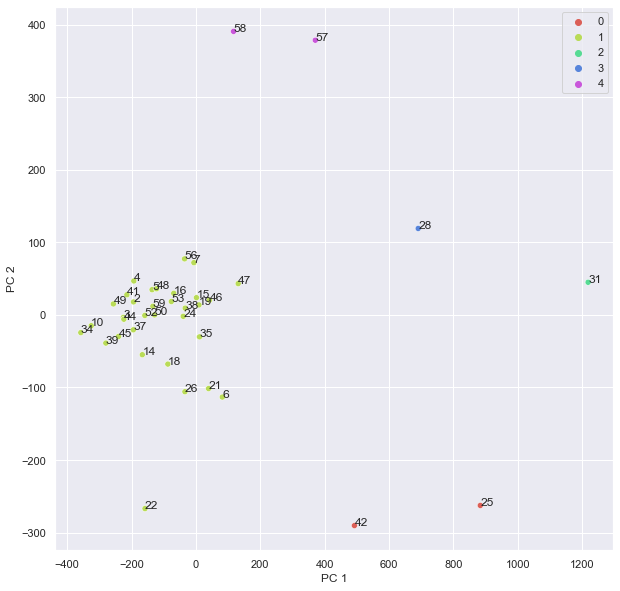

In [63]:
n_clusters = 5
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
# clusterer = KMeans(n_clusters=n_clusters)
# components.loc[:,:] = StandardScaler().fit_transform(components)
labels = clusterer.fit_predict(components)

x = components[0]
y = components[1]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.scatter(x, y, alpha=.5)
sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls",n_clusters), ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for i, txt in enumerate(pt.index.to_list()):
    ax.annotate(str(txt), (x[i], y[i]))

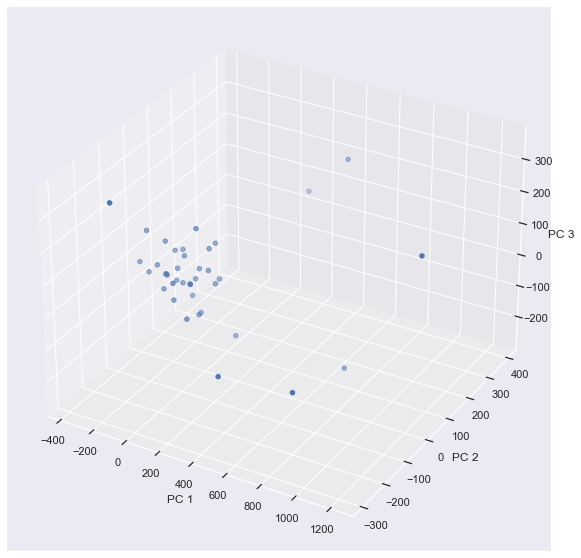

In [27]:
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
x = components[0]
y = components[1]
z = components[2]
ax.scatter(x, y, z)
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

X = pt
# y = iris.target

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

NameError: name 'pt' is not defined

In [35]:
PCA_components.loc[:,:4]

,0,1,2,3,4,5,6
0,-49.568500,-4.866604,-14.303686,-21.254714,-0.891878,-5.107738,-2.582151
1,-49.512683,-4.901191,-12.434412,-21.731319,-1.614088,-5.423957,-5.623423
2,-41.298995,-7.333574,-14.883682,-20.123153,-4.842572,-0.853880,-9.023261
3,-34.415916,-4.908393,-15.273342,-14.129494,-5.725181,-3.052755,-11.321641
4,5.956448,7.342454,-18.288735,1.512873,12.341433,-11.655760,-2.903537
5,-20.165291,-4.591798,-18.873345,-5.090433,-8.244705,-6.574901,-16.104521
6,-55.269123,-6.881316,-10.416210,-28.756439,-1.076049,-1.128455,-2.777782
7,-35.708901,8.591028,-14.310618,-37.900043,47.715930,-7.472904,256.269400
8,-42.712810,-2.571890,-14.584901,-20.070182,4.899349,-6.297331,-2.941555
9,-24.013755,-2.364426,-16.829334,-9.855961,-0.608944,-5.695260,-11.031984


# Repeat the clustering but with multiple runs of k-means

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

scorelist = []
nrange = range(2,20)
for n in nrange:
    clusterer = KMeans(n_clusters=n)
    labels = clusterer.fit_predict(PCA_components.loc[:,:4])
    silscore = silhouette_score(pt, labels)
    scorelist.append(silscore)

In [47]:
fig, ax = plt.subplots(111)
# sns.lineplot(x=nrange, y=scorelist, ax=ax)
sns.lineplot(x=list(nrange), y=scorelist)
# plt.show()
# print(silscore)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

<AxesSubplot:>

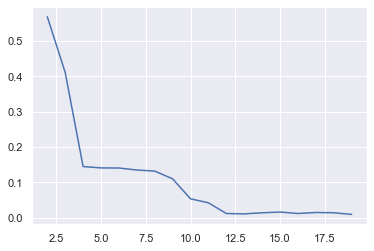

In [228]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

scorelist = []
nrange = range(2,20)
for n in nrange:
    clusterer = AgglomerativeClustering(n_clusters=n)
#     labels = clusterer.fit_predict(pt)
    labels = clusterer.fit_predict(components)
    silscore = silhouette_score(pt, labels)
    scorelist.append(silscore)

sns.lineplot(x=nrange, y=scorelist)
# print(silscore)

In [222]:
clusterer = AgglomerativeClustering(n_clusters=4)
labels = clusterer.fit_predict(components)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [223]:
pt.index

Int64Index([ 2,  3,  4,  5,  6,  7, 10, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26,
            28, 31, 34, 35, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52,
            53, 56, 57, 58, 59],
           dtype='int64', name='shop_id')

In [224]:
shoplabs = {}
for i, s in enumerate(pt.index):
    shoplabs[s] =  labels[i]
shoplabs

{2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 10: 0,
 14: 0,
 15: 0,
 16: 0,
 18: 0,
 19: 0,
 21: 0,
 22: 0,
 24: 0,
 25: 2,
 26: 0,
 28: 1,
 31: 3,
 34: 0,
 35: 0,
 37: 0,
 38: 0,
 39: 0,
 41: 0,
 42: 1,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 52: 0,
 53: 0,
 56: 0,
 57: 1,
 58: 0,
 59: 0}

<AxesSubplot:>

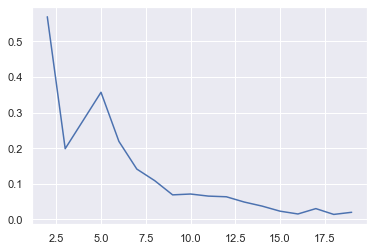

In [351]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

scorelist = []
nrange = range(2,20)
for n in nrange:
    clusterer = KMeans(n_clusters=n)
#     labels = clusterer.fit_predict(pt)
    labels = clusterer.fit_predict(components)
    silscore = silhouette_score(pt, labels)
    scorelist.append(silscore)

sns.lineplot(x=nrange, y=scorelist)
# print(silscore)

PCA

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

def shop_cluster_features(matrix, n_clusters=5, add_feature=True):
    start_month=20
    end_month=32
    pt = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month} & shop_id!=36 & shop_id!=55 & shop_id!=12")
    # mx = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month} & shop_id!=36")
    pt = pt.pivot_table(values='item_cnt_month', columns='shop_id', index=['item_name_group'], fill_value=0, aggfunc='mean')
    pt = pt.transpose()
    pca = PCA(n_components=4)
    components = pca.fit_transform(pt)
    components = pd.DataFrame(components)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = clusterer.fit_predict(components)
    x = components[0]
    y = components[1]
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls",n_clusters), ax=ax)
    plt.title('Shop clusters')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    for i, txt in enumerate(pt.index.to_list()):
        ax.annotate(str(txt), (x[i], y[i]))
    shopgroups = {}
    for i, s in enumerate(pt.index):
        shopgroups[s] =  labels[i]
    shopgroups[36] = shopgroups[37]
    shopgroups[55] = max(shopgroups.values()) + 1
    shopgroups[12] = max(shopgroups.values()) + 1
    if add_feature==True:
        matrix['shop_group_id'] = fu.reduce_mem_usage(matrix['shop_id'].map(shopgroups))
        return matrix
    

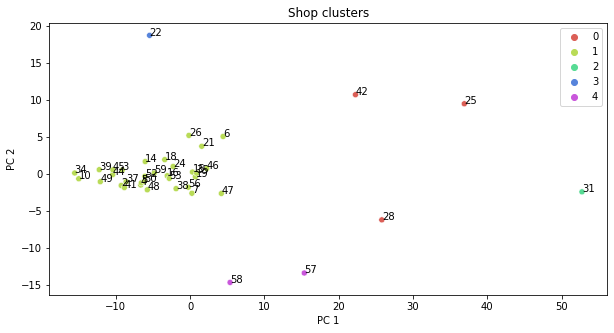

In [55]:
mix = shop_cluster_features(matrix, n_clusters=5, add_feature=True)

In [99]:
shopgroups = {}
for i, s in enumerate(pt.index):
    shopgroups[s] =  labels[i]
shopgroups[36] = shopgroups[37]
shopgroups[55] = max(shopgroups.values()) + 1
shopgroups[12] = max(shopgroups.values()) + 1
matrix['shop_group_id'] = fu.reduce_mem_usage(matrix['shop_id'].map(shopgroups))

In [1]:
import pandas as pd
matrix = pd.read_pickle("matrixcheckpoint_1.pkl")

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


def cluster_feature(matrix, target_feature, clust_feature, level_feature, n_components=4, n_clusters=5, aggfunc="mean", exclude=None):
    start_month = 20
    end_month = 32
    pt = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month}")
    if exclude is not None:
        pt = matrix[~matrix[clust_feature].isin(exclude)]
    pt = pt.pivot_table(values=target_feature, columns=clust_feature, index=level_feature, fill_value=0, aggfunc=aggfunc)
    pt = pt.transpose()
    pca = PCA(n_components=10)
    components = pca.fit_transform(pt)
    components = pd.DataFrame(components)
    # Plot PCA explained variance
    sns.set_theme()
    features = list(range(pca.n_components_))
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(121)
#     ax.bar(features, pca.explained_variance_ratio_, color="black")
    sns.barplot(x=features, y=pca.explained_variance_ratio_, ax=ax)
    plt.title("Variance by PCA components")
    plt.xlabel("component")
    plt.ylabel("explained variance")
    plt.xticks(features)

    scorelist = []
    nrange = range(2, 10)
    for n in nrange:
        clusterer = AgglomerativeClustering(n_clusters=n)
        labels = clusterer.fit_predict(components)
        silscore = silhouette_score(pt, labels)
        scorelist.append(silscore)
    ax = fig.add_subplot(122)
    sns.lineplot(x=nrange, y=scorelist, ax=ax)
    plt.title("Clustering quality by number of clusters")
    plt.xlabel("n clusters")
    plt.ylabel("silhouette score")

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(pt)
    components = pd.DataFrame(components)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage="average")
    labels = clusterer.fit_predict(components)
    x = components[0]
    y = components[1]
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)
    sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls", n_clusters), ax=ax)
    plt.title("Items by cluster")
    plt.xlabel("component 1 score")
    plt.ylabel("component 2 score")
    for i, txt in enumerate(pt.index.to_list()):
        ax.annotate(str(txt), (x[i], y[i]))
    groups = {}
    for i, s in enumerate(pt.index):
        groups[s] = labels[i]
    return groups

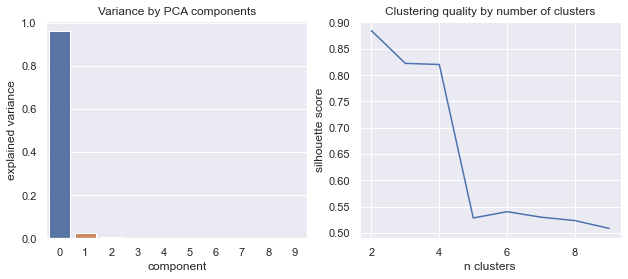

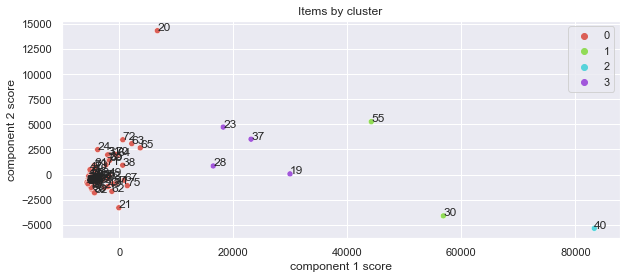

In [100]:
# shop_group_dict = category_cluster_features(matrix, n_clusters=4, exclude =[71, 35, 79, 12, 20, 3])
category_group_dict = cluster_feature(matrix, 'item_cnt_month', 'item_category_id', 'date_block_num', n_components=2, n_clusters=4, aggfunc="sum", exclude =[])
matrix['category_cluster'] = matrix['item_category_id'].map(category_group_dict)

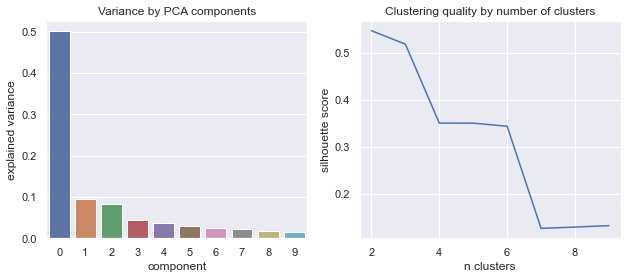

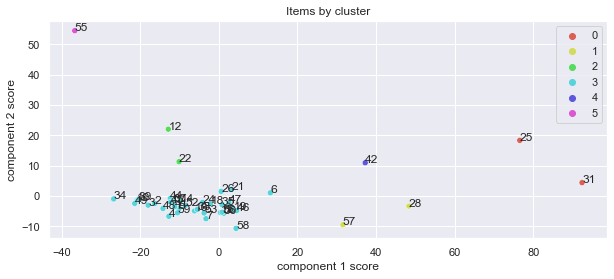

In [104]:
# shop_group_dict = cluster_feature(matrix, 'item_cnt_month', 'shop_id', 'item_name_group', n_clusters=2, aggfunc="mean", exclude=[55, 12, 36])
shop_group_dict = cluster_feature(matrix, 'item_cnt_month', 'shop_id', 'item_name_group', n_components=4, n_clusters=6, aggfunc="mean", exclude=[36])
shop_group_dict[36] = shop_group_dict[37]
# shop_group_dict[55] = max(shop_group_dict.values()) + 1
# shop_group_dict[12] = max(shop_group_dict.values()) + 1
matrix['shop_cluster'] = matrix['shop_id'].map(shop_group_dict)

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

def shop_cluster_features(matrix, n_clusters=5):
    start_month=20
    end_month=32
#     pt = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month} & shop_id!=36 & shop_id!=55 & shop_id!=12")
    mx = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month} & shop_id!=36")
    pt = pt.pivot_table(values='item_cnt_month', columns='shop_id', index=['item_name_group'], fill_value=0, aggfunc='sum')
    pt = pt.transpose()
    pca = PCA(n_components=4)
    components = pca.fit_transform(pt)
    components = pd.DataFrame(components)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = clusterer.fit_predict(components)
    x = components[0]
    y = components[1]
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls",n_clusters), ax=ax)
    plt.title('Shop clusters')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    for i, txt in enumerate(pt.index.to_list()):
        ax.annotate(str(txt), (x[i], y[i]))
    shopgroups = {}
    for i, s in enumerate(pt.index):
        shopgroups[s] =  labels[i]
    shopgroups[36] = shopgroups[37]
    shopgroups[55] = max(shopgroups.values()) + 1
    shopgroups[12] = max(shopgroups.values()) + 1
    return shopgroups
    

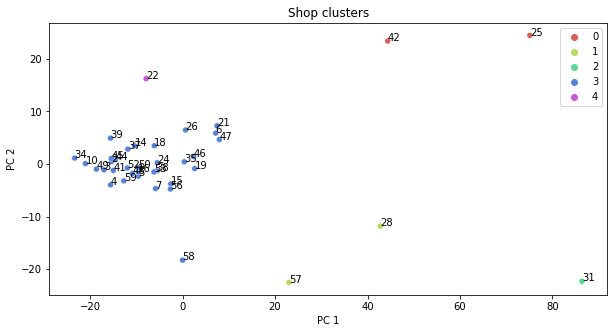

In [18]:
shop_group_dict = shop_cluster_features(matrix, n_clusters=5)
matrix['shop_group'] = matrix['shop_id'].map(shop_group_dict)

In [48]:
start_month=20
end_month=32
exclude =[]
pt = matrix.query(f"date_block_num>{start_month} & date_block_num<={end_month}")
if exclude is not None:
    pt = matrix[~matrix['item_category_id'].isin(exclude)]

pt = pt.pivot_table(values='item_cnt_month', columns='item_category_id', index=['date_block_num'], fill_value=0, aggfunc='mean')
pt = pt.transpose()

In [49]:
# PCA version
df = pt
# Standardize the data to have a mean of ~0 and a variance of 1
# df = StandardScaler().fit_transform(df)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df)
components = pd.DataFrame(principalComponents)
# Plot the explained variances
features = range(pca.n_components_)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.bar(features, pca.explained_variance_ratio_, color='black')
# # ax.bar(features, pca.reconstruction_err_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)
# plt.show()

In [57]:
features = list(features)

In [52]:
pca.explained_variance_ratio_

array([0.82115758, 0.10970312, 0.04191724, 0.01791938])

([<matplotlib.axis.XTick at 0x2da032f48e0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

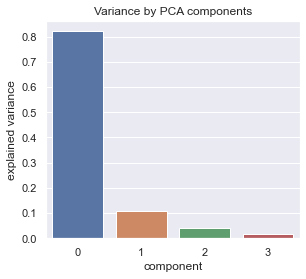

In [58]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
#     ax.bar(features, pca.explained_variance_ratio_, color="black")
sns.barplot(y=pca.explained_variance_ratio_, x=features, ax=ax)
plt.title("Variance by PCA components")
plt.xlabel("component")
plt.ylabel("explained variance")
plt.xticks(features)

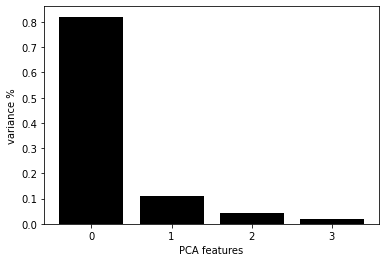

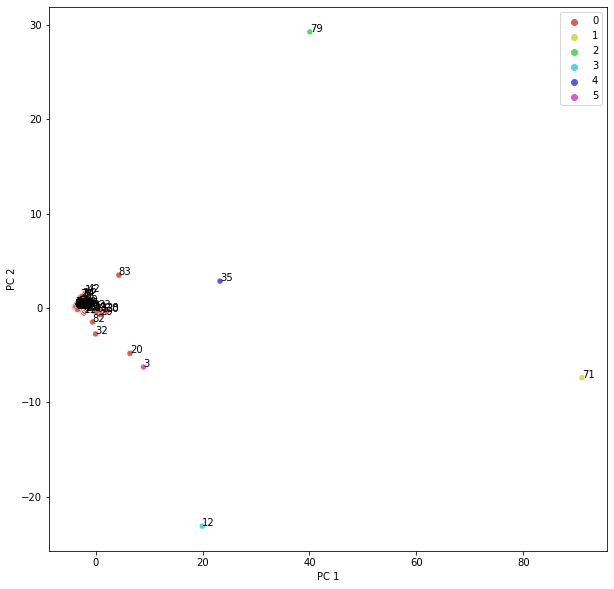

In [17]:
n_clusters = 6
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
# clusterer = KMeans(n_clusters=n_clusters)
# components.loc[:,:] = StandardScaler().fit_transform(components)
labels = clusterer.fit_predict(components)

x = components[0]
y = components[1]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.scatter(x, y, alpha=.5)
sns.scatterplot(x=x, y=y, hue=labels, palette=sns.color_palette("hls",n_clusters), ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
for i, txt in enumerate(pt.index.to_list()):
    ax.annotate(str(txt), (x[i], y[i]))

# Repeat the clustering but with multiple runs of k-means

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

scorelist = []
nrange = range(2,15)
for n in nrange:
    clusterer = KMeans(n_clusters=n)
    labels = clusterer.fit_predict(components)
    silscore = silhouette_score(pt, labels)
    scorelist.append(silscore)

<AxesSubplot:>

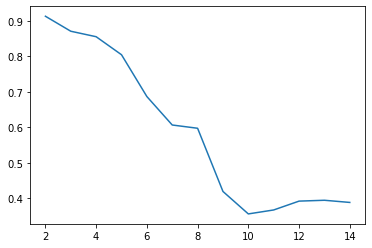

In [46]:
sns.lineplot(x=nrange, y=scorelist)

<AxesSubplot:>

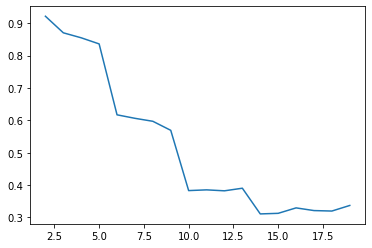

In [36]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

scorelist = []
nrange = range(2,20)
for n in nrange:
    clusterer = AgglomerativeClustering(n_clusters=n)
#     labels = clusterer.fit_predict(pt)
    labels = clusterer.fit_predict(components)
    silscore = silhouette_score(pt, labels)
    scorelist.append(silscore)

sns.lineplot(x=nrange, y=scorelist)
# print(silscore)